# Animation example

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

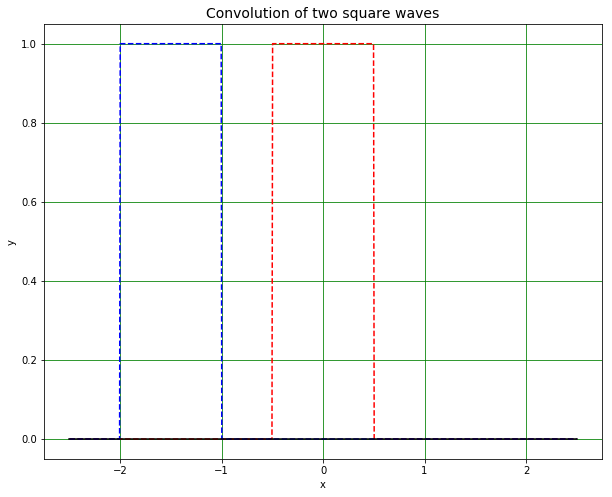

In [2]:
def f(t):
    tfLo = -1/2
    tfHi = 1/2
    f = np.ones(len(t))*(t > tfLo)*(t < tfHi)
    return f
#
def g(t):
    tgLo = -1/2
    tgHi = 1/2
    g = np.ones(len(t))*(t > tgLo)*(t < tgHi)
    return g
#
def fSg(t, tauArr):
    tMin = tauArr[0]
    tMax = tauArr[len(tauArr) - 1]
    fg = np.cumsum(f(tauArr)*g(t - tauArr))[len(tauArr) - 1]*(tMax - tMin)/len(tauArr)
    return fg
#
tauLo = -2.5
tauHi = 2.5
nTau= 800
tauArr = np.linspace(tauLo, tauHi, nTau)
tBot = -1.5
tTop = 1.5
nTimes = 200
timeArr = np.linspace(tBot, tTop, nTimes)
#
fsgArr = np.zeros(nTimes)
for i in range(0, nTimes):
    fsgArr[i] = fSg(timeArr[i], tauArr)
#
Writer = animation.writers['ffmpeg']
writer = Writer(fps = 20, metadata = dict(artist = 'TG'), bitrate = 1800)
#
fig = plt.figure(figsize = (10, 8))
#
def animate(i):
    plt.cla()
    plt.title("Convolution of two square waves", fontsize = 14)
    plt.plot(tauArr, f(tauArr), linestyle = '--', color = 'r', label = "f")
    plt.plot(tauArr, g(timeArr[i] - tauArr), linestyle = '--', color = 'b', label = "g")
    plt.plot(tauArr, f(tauArr)*g(timeArr[i] - tauArr), linestyle = '-', color = 'k', label = "f x g")
    plt.plot(timeArr[0:i], fsgArr[0:i], linestyle = '-', color = 'c', label = "f * g")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(color = 'g')
#
ani = matplotlib.animation.FuncAnimation(fig, animate, frames = nTimes, repeat = True)
#
ani.save('Convolution.mp4', writer = writer)
plt.show()